<a href="https://colab.research.google.com/github/WagnerMiron/introducao_a_ciencia_de_dados/blob/main/T%C3%B3picos_Especiais_em_Projetos_4_Atividade_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importação de Bibliotecas

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

Geração de Dados Sintéticos

In [38]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=2, random_state=42)


Divisão do Conjunto de Dados e treninamento do algoritmo

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Avaliação do Modelo

**Matriz de Confusão**

A matriz de confusão é uma ferramenta que permite visualizar o desempenho de um modelo de classificação. Ela compara as previsões do modelo com os valores reais das classes em um formato tabular, geralmente em uma matriz 2x2 para problemas binários.


A matriz de confusão tem quatro componentes principais:

Verdadeiros Positivos (VP): Número de casos em que a classe positiva foi corretamente prevista.

Verdadeiros Negativos (VN): Número de casos em que a classe negativa foi corretamente prevista.

Falsos Positivos (FP): Número de casos em que a classe negativa foi incorretamente prevista como positiva (erro tipo I).

Falsos Negativos (FN): Número de casos em que a classe positiva foi incorretamente prevista como negativa (erro tipo II).

**Quando se aumenta a quantidades de dados vemos o surgimento de Falsos positivos e Falsos negativos.**

In [40]:
#Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

Matriz de Confusão:
[[141   6]
 [ 13 140]]


**Curva ROC**

A Curva ROC é uma representação gráfica que mostra o desempenho de um classificador binário em diferentes limiares de decisão. A curva traça a taxa de verdadeiros positivos (sensibilidade ou recall) contra a taxa de falsos positivos (1 - especificidade).

Eixo X: Taxa de Falsos Positivos (FPR) - número de negativos que foram classificados incorretamente como positivos.

Eixo Y: Taxa de Verdadeiros Positivos (TPR) - número de positivos que foram classificados corretamente.

AUC (Área Sob a Curva): Um valor entre 0 e 1 que resume o desempenho do modelo. Um AUC de 0.5 indica um modelo sem poder discriminatório, enquanto um AUC de 1.0 indica um modelo perfeito.

**No modelo apresentado percebemos que a AUC se aproxima de 1 quando temos uma quantidade menor de amostras, quando aumentamos muito a quantidade de dados, vemos a AUC diminuir.**

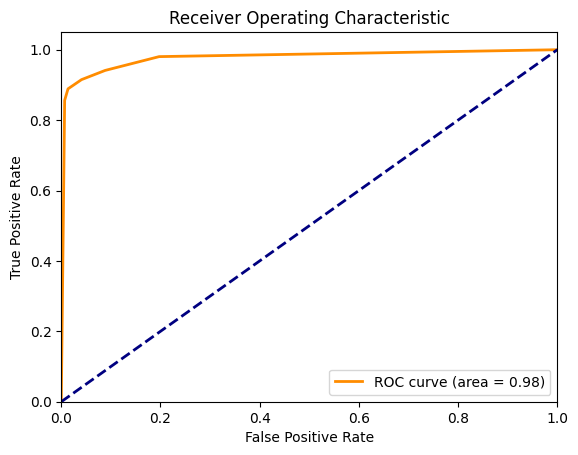

In [41]:
#Curva ROC
y_pred_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Erro em Função do k**


Em algoritmos de classificação como o K-Nearest Neighbors (k-NN), a escolha do número de vizinhos k pode afetar significativamente o desempenho do modelo. A curva de erro em função do k mostra como o erro de classificação varia ao se alterar o valor de k.

Erro de Treinamento: Erro cometido pelo modelo ao classificar os dados de treinamento.

Erro de Teste: Erro cometido pelo modelo ao classificar os dados de teste.
O objetivo é encontrar um valor de k que minimize o erro de teste sem superajustar os dados de treinamento.



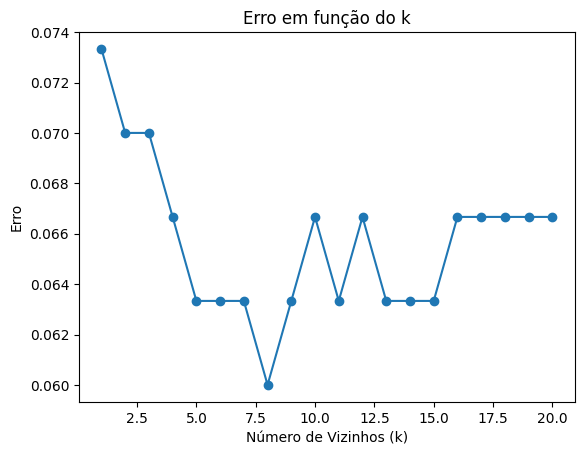

In [42]:
# Erro em Função do k
errors = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_i = knn.predict(X_test)
    errors.append(np.mean(y_pred_i != y_test))

plt.figure()
plt.plot(range(1, 21), errors, marker='o')
plt.title('Erro em função do k')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Erro')
plt.show()

**Fronteira de Decisão**

A fronteira de decisão é a linha ou região que separa as diferentes classes previstas por um modelo de classificação. Em um espaço bidimensional, é a linha que divide as diferentes regiões onde o modelo classifica uma amostra como pertencente a uma classe ou outra.


Fronteiras lineares: São criadas por classificadores lineares, como a regressão logística. A fronteira é uma linha reta.

Fronteiras não lineares: Criadas por modelos como SVMs com kernel ou redes neurais. A fronteira pode ser complexa e curvilínea, dependendo dos dados e do modelo.

<ipython-input-14-c6ede4284af2>:12: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', label='Teste')


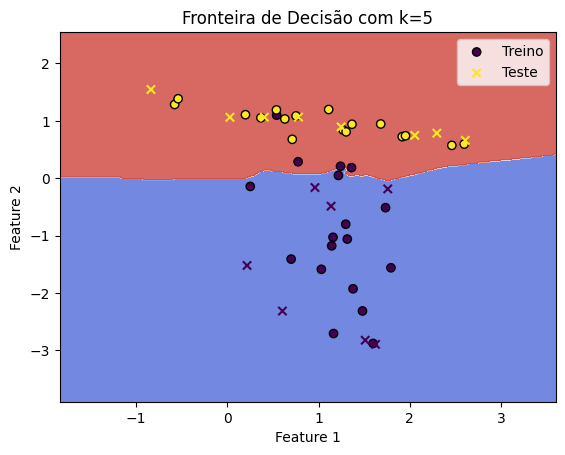

In [14]:
#Fronteira de Decisão
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label='Treino')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', label='Teste')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Fronteira de Decisão com k={k}')
plt.legend()
plt.show()